In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split #for splitting dataset in 2 parts test n train
import matplotlib.pyplot as plt
import pandas  as pd #Data manipulation
import copy
import math
import sklearn
%matplotlib inline

In [ ]:
# load the dataset
path='final.csv'
df = pd.read_csv(path)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance,pickup_hrs,dropoff_hrs,day_week,tpep_pickup_timestamp,tpep_dropoff_timestamp,duration,speed,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2015-01-24 18:00:28,2015-01-24 18:10:07,-73.964111,40.761398,-73.977989,40.783093,2.40,18,18,5,1422122428,1422123007,579,14,NaN,NaN,NaN
1,2015-01-15 4:37:29,2015-01-15 4:58:14,-73.961479,40.760410,-73.943573,40.709702,5.00,4,4,3,1421296649,1421297894,1245,14,NaN,NaN,NaN
2,2015-01-09 5:14:31,2015-01-09 5:47:16,-73.986893,40.761726,-73.873169,40.774326,10.25,5,5,4,1420780471,1420782436,1965,18,NaN,NaN,NaN
3,2015-01-29 9:52:05,2015-01-29 10:16:33,-73.965759,40.758114,-74.010399,40.701965,5.46,9,10,3,1422525125,1422526593,1468,13,NaN,NaN,NaN
4,2015-01-02 2:20:01,2015-01-02 2:27:37,-73.955032,40.821857,-73.950897,40.808399,1.50,2,2,4,1420165201,1420165657,456,11,NaN,NaN,NaN


In [ ]:
df.isnull().values.any()

True

In [ ]:
df.shape

(171248, 17)

In [ ]:
df=df.drop('Unnamed: 14', axis=1)
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance,pickup_hrs,dropoff_hrs,day_week,tpep_pickup_timestamp,tpep_dropoff_timestamp,duration,speed,Unnamed: 15,Unnamed: 16
0,2015-01-24 18:00:28,2015-01-24 18:10:07,-73.964111,40.761398,-73.977989,40.783093,2.40,18,18,5,1422122428,1422123007,579,14,NaN,NaN
1,2015-01-15 4:37:29,2015-01-15 4:58:14,-73.961479,40.760410,-73.943573,40.709702,5.00,4,4,3,1421296649,1421297894,1245,14,NaN,NaN
2,2015-01-09 5:14:31,2015-01-09 5:47:16,-73.986893,40.761726,-73.873169,40.774326,10.25,5,5,4,1420780471,1420782436,1965,18,NaN,NaN
3,2015-01-29 9:52:05,2015-01-29 10:16:33,-73.965759,40.758114,-74.010399,40.701965,5.46,9,10,3,1422525125,1422526593,1468,13,NaN,NaN
4,2015-01-02 2:20:01,2015-01-02 2:27:37,-73.955032,40.821857,-73.950897,40.808399,1.50,2,2,4,1420165201,1420165657,456,11,NaN,NaN


In [ ]:
df=df.drop('Unnamed: 15', axis=1)
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance,pickup_hrs,dropoff_hrs,day_week,tpep_pickup_timestamp,tpep_dropoff_timestamp,duration,speed,Unnamed: 16
0,2015-01-24 18:00:28,2015-01-24 18:10:07,-73.964111,40.761398,-73.977989,40.783093,2.40,18,18,5,1422122428,1422123007,579,14,NaN
1,2015-01-15 4:37:29,2015-01-15 4:58:14,-73.961479,40.760410,-73.943573,40.709702,5.00,4,4,3,1421296649,1421297894,1245,14,NaN
2,2015-01-09 5:14:31,2015-01-09 5:47:16,-73.986893,40.761726,-73.873169,40.774326,10.25,5,5,4,1420780471,1420782436,1965,18,NaN
3,2015-01-29 9:52:05,2015-01-29 10:16:33,-73.965759,40.758114,-74.010399,40.701965,5.46,9,10,3,1422525125,1422526593,1468,13,NaN
4,2015-01-02 2:20:01,2015-01-02 2:27:37,-73.955032,40.821857,-73.950897,40.808399,1.50,2,2,4,1420165201,1420165657,456,11,NaN


In [ ]:
df=df.drop('Unnamed: 16', axis=1)
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance,pickup_hrs,dropoff_hrs,day_week,tpep_pickup_timestamp,tpep_dropoff_timestamp,duration,speed
0,2015-01-24 18:00:28,2015-01-24 18:10:07,-73.964111,40.761398,-73.977989,40.783093,2.40,18,18,5,1422122428,1422123007,579,14
1,2015-01-15 4:37:29,2015-01-15 4:58:14,-73.961479,40.760410,-73.943573,40.709702,5.00,4,4,3,1421296649,1421297894,1245,14
2,2015-01-09 5:14:31,2015-01-09 5:47:16,-73.986893,40.761726,-73.873169,40.774326,10.25,5,5,4,1420780471,1420782436,1965,18
3,2015-01-29 9:52:05,2015-01-29 10:16:33,-73.965759,40.758114,-74.010399,40.701965,5.46,9,10,3,1422525125,1422526593,1468,13
4,2015-01-02 2:20:01,2015-01-02 2:27:37,-73.955032,40.821857,-73.950897,40.808399,1.50,2,2,4,1420165201,1420165657,456,11


In [ ]:
df.shape

(171248, 14)

In [ ]:
df.isnull().values.any()

False

In [ ]:
X=(df[['tpep_pickup_datetime','tpep_dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','trip_distance','pickup_hrs','dropoff_hrs','day_week','tpep_pickup_timestamp','tpep_dropoff_timestamp','speed']])
Y=(df[['duration']])
#X = np.array(df.drop(['duration'], 1))
#Y = np.array(df['duration'])
x_train, x_test, y_train, y_test=train_test_split(X,Y,random_state=0, test_size=0.2)

In [ ]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5])

Type of x_train: <class 'pandas.core.frame.DataFrame'>
First five elements of x_train are:
        tpep_pickup_datetime tpep_dropoff_datetime  pickup_longitude  \
142473  2015-01-10 14:12:58   2015-01-10 14:24:41        -73.998917   
154175  2015-01-19 11:26:58   2015-01-19 11:52:10        -73.981010   
111097  2015-01-03 21:26:01   2015-01-03 21:29:53        -73.994797   
56181   2015-01-28 22:39:30   2015-01-28 22:45:28        -73.973198   
168900  2015-01-14 23:12:44   2015-01-14 23:38:38        -74.006279   

        pickup_latitude  dropoff_longitude  dropoff_latitude  trip_distance  \
142473        40.722969         -73.999153         40.743992           2.10   
154175        40.767570         -73.948936         40.784153           3.80   
111097        40.750423         -74.001083         40.746983           0.70   
56181         40.763790         -73.962112         40.767952           0.90   
168900        40.705971         -73.954155         40.821308          11.32   

      

In [ ]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5]) 

Type of y_train: <class 'pandas.core.frame.DataFrame'>
First five elements of y_train are:
         duration
142473       703
154175      1512
111097       232
56181        358
168900      1554


In [ ]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (136998, 13)
The shape of y_train is:  (136998, 1)
Number of training examples (m): 136998


In [ ]:
print ('The shape of x_test is:', x_test.shape)
print ('The shape of y_test is: ', y_test.shape)
print ('Number of training examples (m_test):', len(x_test))

The shape of x_test is: (34250, 13)
The shape of y_test is:  (34250, 1)
Number of training examples (m_test): 34250


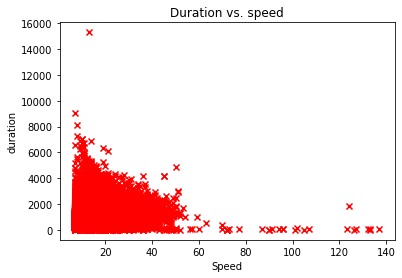

In [ ]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train['speed'], y_train, marker='x', c='r') 

# Set the title
plt.title("Duration vs. speed")
# Set the y-axis label
plt.ylabel('duration')
# Set the x-axis label
plt.xlabel('Speed')
plt.show()

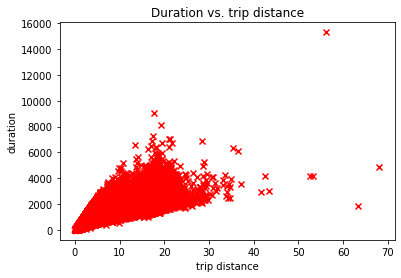

In [ ]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train['trip_distance'], y_train, marker='x', c='r') 

# Set the title
plt.title("Duration vs. trip distance")
# Set the y-axis label
plt.ylabel('duration')
# Set the x-axis label
plt.xlabel('trip distance')
plt.show()

In [ ]:
X_features = ['tpep_pickup_datetime','tpep_dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','trip_distance','pickup_hrs','dropoff_hrs','day_week','tpep_pickup_timestamp','tpep_dropoff_timestamp','speed']

In [ ]:
numericl_feature=[feature for feature in df.columns if df[feature].dtypes!="0" ]

In [ ]:
import seaborn as sns
for feature in numericl_feature:
  sns.scatterplot(x=df[feature],y=df['duration'])
  plt.show()

In [ ]:
def zscore_normalize_features(A):
    
    # find the mean of each column/feature
    mu     = np.mean(A, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(A, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (A - mu) / sigma      

    return (X_norm, mu, sigma)

In [ ]:
mu     = np.mean(x_train,axis=0)   
sigma  = np.std(x_train,axis=0) 
X_mean = (x_train - mu)
X_norm = (x_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(x_train.iloc[:,0], x_train.iloc[:,12])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[12]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean.iloc[:,0], X_mean.iloc[:,12])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[12]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm.iloc[:,0], X_norm.iloc[:,12])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[12]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [ ]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(x_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train.iloc[:,3:13],axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm.iloc[:,3:13],axis=0)}")

#here the error is because the first two colomns are string type so we do not need to normalize 
#it as either we can convert them in integer and use it but we have already done that with pickup time and 
#drop up time so use iloc and remove 1st 2 columns


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


X_mu = pickup_longitude         -7.264022e+01
pickup_latitude           4.001599e+01
dropoff_longitude        -7.276335e+01
dropoff_latitude          4.008504e+01
trip_distance             3.046386e+00
pickup_hrs                1.360477e+01
dropoff_hrs               1.357521e+01
day_week                  3.316413e+00
tpep_pickup_timestamp     1.421401e+09
tpep_dropoff_timestamp    1.421402e+09
speed                     1.310272e+01
dtype: float64, 
X_sigma = pickup_longitude               9.842895
pickup_latitude                5.422363
dropoff_longitude              9.383417
dropoff_latitude               5.169352
trip_distance                  3.539273
pickup_hrs                     6.638160
dropoff_hrs                    6.709342
day_week                       1.892820
tpep_pickup_timestamp     758921.618849
tpep_dropoff_timestamp    758936.953039
speed                          6.158033
dtype: float64
Peak to Peak range by column in Raw        X:[4.10207214e+01 7.49614563e+01 4.1046

In [ ]:
X_norm.head()

,day_week,dropoff_hrs,dropoff_latitude,dropoff_longitude,pickup_hrs,pickup_latitude,pickup_longitude,speed,tpep_dropoff_datetime,tpep_dropoff_timestamp,tpep_pickup_datetime,tpep_pickup_timestamp,trip_distance
142473,0.889459,0.063313,0.127473,-0.131700,0.059539,0.130382,-0.138039,-0.503850,NaN,-0.661834,NaN,-0.661804,-0.267396
154175,-1.752102,-0.383825,0.135242,-0.126349,-0.392393,0.138608,-0.136219,-0.666239,NaN,0.350700,NaN,0.349684,0.212929
111097,0.889459,1.106634,0.128052,-0.131906,1.114048,0.135445,-0.137620,-0.503850,NaN,-1.425122,NaN,-1.424488,-0.662957
56181,-0.695477,1.255680,0.132108,-0.127753,1.264693,0.137910,-0.135426,-0.666239,NaN,1.426939,NaN,1.427466,-0.606448
168900,-0.695477,1.404726,0.142430,-0.126905,1.415337,0.127247,-0.138787,2.094382,NaN,-0.162666,NaN,-0.163747,2.337659


In [ ]:
X_norm=X_norm.drop(['tpep_dropoff_datetime'],axis=1)

In [ ]:
X_norm=X_norm.drop(['tpep_pickup_datetime'],axis=1)
X_norm.head()

,day_week,dropoff_hrs,dropoff_latitude,dropoff_longitude,pickup_hrs,pickup_latitude,pickup_longitude,speed,tpep_dropoff_timestamp,tpep_pickup_timestamp,trip_distance
142473,0.889459,0.063313,0.127473,-0.131700,0.059539,0.130382,-0.138039,-0.503850,-0.661834,-0.661804,-0.267396
154175,-1.752102,-0.383825,0.135242,-0.126349,-0.392393,0.138608,-0.136219,-0.666239,0.350700,0.349684,0.212929
111097,0.889459,1.106634,0.128052,-0.131906,1.114048,0.135445,-0.137620,-0.503850,-1.425122,-1.424488,-0.662957
56181,-0.695477,1.255680,0.132108,-0.127753,1.264693,0.137910,-0.135426,-0.666239,1.426939,1.427466,-0.606448
168900,-0.695477,1.404726,0.142430,-0.126905,1.415337,0.127247,-0.138787,2.094382,-0.162666,-0.163747,2.337659


In [ ]:
fig,ax=plt.subplots(1, 11)
for i in range(len(ax)):
    ax[i].hist(x_train.iloc[3:13,i],bins=[0,25,50,75,100])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,11)
for i in range(len(ax)):
    ax[i].hist(x_train.iloc[3:13,i],bins=[0,0.5,1,1.5,2])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")

plt.show()

In [ ]:
np.savetxt('normdata.csv',X_norm)

In [ ]:
nf=(pd.read_csv('normdata.csv'))
nf.head()

,8.894593302558199133e-01 6.331279649168067292e-02 1.274731955099121239e-01 -1.317003017259952002e-01 5.953939825895909754e-02 1.303820669372111607e-01 -1.380386874567989530e-01 -5.038498964548813186e-01 -6.618336254871238777e-01 -6.618040418684262294e-01 -2.673955274855029374e-01
0,-1.752101605160633513e+00 -3.83824921204029390...
1,8.894593302558199133e-01 1.106634137781670857e...
2,-6.954772309940522312e-01 1.255680043680240887...
3,-6.954772309940522312e-01 1.404725949578810917...
4,-6.954772309940522312e-01 3.614046082888207057...


In [ ]:
X_norm=X_norm.to_numpy()

In [ ]:
y_train=y_train.to_numpy()

In [ ]:
X_norm[5,:]

array([-0.69547723,  0.36140461,  0.117691  , -0.13173282,  0.36082771,
        0.13359501, -0.13673959,  0.1457082 , -0.19495426, -0.19603921,
        0.90798708])

In [ ]:
#dont run used this to drop 2 unnecessary column
#X_norm=X_norm.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1 

In [ ]:
X_norm.shape
print("First five elements in X_norm are:\n", X_norm[:5])
print("Type of X_norm:",type(X_norm))

First five elements in X_norm are:
 [[ 0.88945933  0.0633128   0.1274732  -0.1317003   0.0595394   0.13038207
  -0.13803869 -0.5038499  -0.66183363 -0.66180404 -0.26739553]
 [-1.75210161 -0.38382492  0.13524228 -0.12634866 -0.39239307  0.13860753
  -0.13621949 -0.66623942  0.35069976  0.34968381  0.2129291 ]
 [ 0.88945933  1.10663414  0.12805174 -0.13190601  1.11404849  0.13544524
  -0.13762012 -0.5038499  -1.42512233 -1.42448755 -0.66295698]
 [-0.69547723  1.25568004  0.13210823 -0.12775284  1.26469265  0.13791035
  -0.13542577 -0.66623942  1.42693935  1.42746573 -0.6064482 ]
 [-0.69547723  1.40472595  0.14242986 -0.1269048   1.4153368   0.12724722
  -0.13878667  2.0943825  -0.16266568 -0.16374734  2.3376592 ]]
Type of X_norm: <class 'numpy.ndarray'>


In [ ]:

def compute_loss(x, y, yp): 
  n=len(y)
  total_loss = 0
    
  for i in range(n):
                                           
    total_loss = total_loss + (y[i] - yp[i])**2       
                            
    
  return (total_loss)/(n)

In [ ]:
def my_dot(a, b): 
    x=0
    for i in range(a.shape[0]):
        x = x + a[i] * b[i]
    return x

In [ ]:
#code for "wx+b function"
def predicted_y(w,x,b):
  y_lst=[]
  for i in range(len(x)):
    k=my_dot(w,x[i])+b
    y_lst.append(k)#dot product
  return np.array(y_lst)

In [ ]:
#derivative of loss wrt weight
def dldw(x,y,yp):
  s=0
  n=len(y)
  for i in range(n):
    s+=-x[i]*(y[i]-yp[i])
  return(2/n)*s

In [ ]:
#derivative of loss wrt bias
def dldb(y,yp):
  n=len(y)
  s=0
  for i in range(len(y)):
    s+=-(y[i]-yp[i])
  return (2/n)*s

In [ ]:
def gradient_descent(x,y):
    w=np.zeros((1,11), dtype=float)
    b=0
    epoch = 20
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001
    

    for i in range(epoch):
        
        
        yp = predicted_y(w,x,b)
        
        w = w - learning_rate *dldw(x,y,yp) 
        
        
        b = b - learning_rate * dldb(y,yp)
        linear_loss.append(compute_loss(x,y,yp))
           
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return w,b
    yp=pd.DataFrame(yp,columns=['duration'])

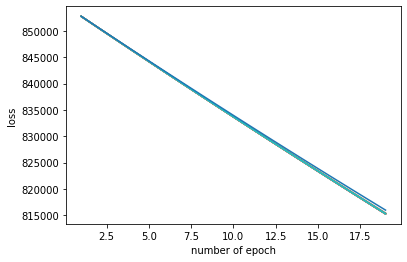

In [ ]:

w,b=gradient_descent(X_norm,y_train)


In [ ]:
print("weight:",w)
print("bias:",b)

weight: [[-0.43968148  0.03566323  0.11680595 -0.12233232 -0.03144603  0.17508611
  -0.17197924  6.28357972  0.620904    0.60439628 18.68550483]]
bias: [28.87160896 28.87160896 28.87160896 28.87160896 28.87160896 28.87160896
 28.87160896 28.87160896 28.87160896 28.87160896 28.87160896]


In [ ]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)

In [ ]:
y_pred=predict(X_norm)
y_pred

array([[19.58515608, 19.58515608, 19.58515608, ..., 19.58515608,
        19.58515608, 19.58515608],
       [29.94099277, 29.94099277, 29.94099277, ..., 29.94099277,
        29.94099277, 29.94099277],
       [11.26395386, 11.26395386, 11.26395386, ..., 11.26395386,
        11.26395386, 11.26395386],
       ...,
       [22.31525782, 22.31525782, 22.31525782, ..., 22.31525782,
        22.31525782, 22.31525782],
       [62.17457196, 62.17457196, 62.17457196, ..., 62.17457196,
        62.17457196, 62.17457196],
       [35.04585013, 35.04585013, 35.04585013, ..., 35.04585013,
        35.04585013, 35.04585013]])

In [ ]:
from sklearn.linear_model import LinearRegression 

lr=LinearRegression()
lr.fit(X_norm,y_train)

LinearRegression()

In [ ]:
X_tnorm, X_tmu, X_tsigma = zscore_normalize_features(x_test)
X_tnorm=X_tnorm.drop(['tpep_dropoff_datetime'],axis=1)
X_tnorm=X_tnorm.drop(['tpep_pickup_datetime'],axis=1)
y_predLR=lr.predict(X_tnorm)
from sklearn.metrics import r2_score
r2_score(y_test,y_predLR)
lr.score(X_tnorm,y_test)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature

0.999992898539656

In [ ]:
X_tnorm=X_tnorm.to_numpy()
y_pred=predict(X_tnorm)
y_pred

array([[13.643937  , 13.643937  , 13.643937  , ..., 13.643937  ,
        13.643937  , 13.643937  ],
       [21.70899931, 21.70899931, 21.70899931, ..., 21.70899931,
        21.70899931, 21.70899931],
       [25.69139396, 25.69139396, 25.69139396, ..., 25.69139396,
        25.69139396, 25.69139396],
       ...,
       [24.01690685, 24.01690685, 24.01690685, ..., 24.01690685,
        24.01690685, 24.01690685],
       [25.00471416, 25.00471416, 25.00471416, ..., 25.00471416,
        25.00471416, 25.00471416],
       [84.88679738, 84.88679738, 84.88679738, ..., 84.88679738,
        84.88679738, 84.88679738]])

In [ ]:
lr.intercept_

array([735.60032988])

In [ ]:
lr.coef_

array([[ 9.37669822e-12, -7.23758831e-11, -2.23351826e-09,
        -2.43869280e-09,  2.07151629e-10,  2.08689310e-09,
         2.30214292e-09, -2.11128892e-11,  7.58936953e+05,
        -7.58921619e+05,  4.37250236e-12]])

In [ ]:
lr.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

method 2 for linear regression

In [ ]:
y_norm, y_nmu, y_nsigma = zscore_normalize_features(y_train)

In [ ]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618,0.39133535, 18.75376741, -53.36032453, -26.42131618,0.39133535, 18.75376741, -53.36032453])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (11,), b_init type: <class 'float'>


In [ ]:
def compute_costlr(X, y, w, b): 
   
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [ ]:
#Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_costlr(X_norm, y_norm, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : [191084.91357021]


In [ ]:
def compute_gradientlr(X, y, w, b): 
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err #bias                     
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                              
        
    return dj_db, dj_dw

In [ ]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradientlr(X_norm, y_norm, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: [49.58080687]
dj_dw at initial w,b: 
 [  10.67025456   24.18793254   36.83301177  -36.72576258   24.55658296
   42.74130351  -42.84824091 -223.33926948    7.03073771    7.48196917
 -539.08619302]


In [ ]:
def gradient_descentlr(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [ ]:
y_tnorm, y_tmu, y_tsigma = zscore_normalize_features(y_test)

In [ ]:
y_test=y_test.to_numpy()

In [ ]:
y_tnorm=y_tnorm.to_numpy()

In [ ]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 10
alpha = 5.0e-4
# run gradient descent 
w_final, b_final, J_hist = gradient_descentlr(X_norm, y_norm, initial_w, initial_b,
                                                    compute_costlr, compute_gradientlr, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final},{w_final} ")
m,_ = X_norm.shape
for i in range(m):
    print(f"prediction: {np.dot(X_norm[i], w_final) + b_final}, target value: {y_norm[i]}")
print(f"now test set prediction and target value comparision")
n,_ = X_tnorm.shape
for i in range(n):
    print(f"prediction: {np.dot(X_tnorm[i], w_final) + b_final}, target value: {y_tnorm[i]}")
    #cost is decreasing in below data
    #accuracy not that good as taken less iterations(only 10 for keeping output runtime short), more iterations better

Streaming output truncated to the last 5000 lines.
prediction: [0.01806907], target value: [1.48457428]
prediction: [-0.00147274], target value: [-0.53565169]
prediction: [-0.00329875], target value: [-0.70712976]
prediction: [-0.00301211], target value: [0.29137274]
prediction: [-0.00124686], target value: [-0.17483326]
prediction: [0.00062374], target value: [1.30773753]
prediction: [-0.00392204], target value: [-1.0983141]
prediction: [-0.00145458], target value: [-0.25164114]
prediction: [-0.00263549], target value: [-0.51064447]
prediction: [-0.00396006], target value: [-0.99292653]
prediction: [-0.00218058], target value: [0.3967603]
prediction: [0.01581778], target value: [0.36996685]
prediction: [-0.00343235], target value: [-0.72677829]
prediction: [-0.00241096], target value: [-0.44098151]
prediction: [0.00058397], target value: [-0.03014864]
prediction: [-0.00287759], target value: [-0.54636907]
prediction: [-0.00122158], target value: [-0.66961893]
prediction: [0.0103587], 

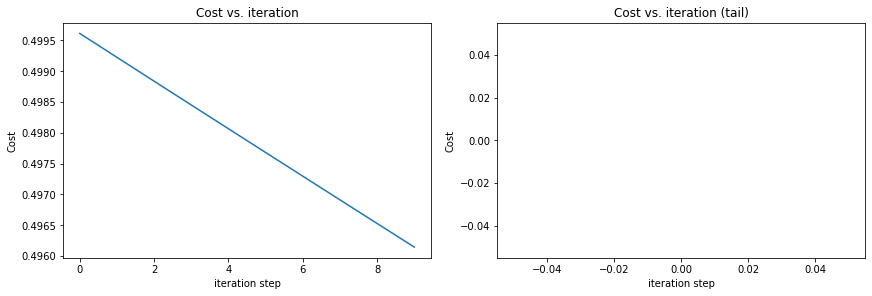

In [ ]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

logistic regression(just model, no way to test as output data is not categorical--can make it categorical and test but won't be real accuracy)

In [ ]:
def sigmoid(z):
   
          
    ### START CODE HERE ### 
    
    g = 1/(1+np.exp(-z))
    ### END SOLUTION ###  
    
    return g

In [ ]:
def compute_cost(X, y, w, b, lambda_= 1):
    
    m, n = X.shape
    total_cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b                                      #(n,)(n,)=scalar, see np.dot
        f_wb_i = sigmoid(z_i)                                          #scalar
        total_cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)      #scalar
             
    total_cost = total_cost/m         

    return total_cost

In [ ]:
m, n = X_norm.shape

initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_norm, y_norm, initial_w, initial_b)
print(cost)


[0.69314718]


In [ ]:
# Compute and display cost with non-zero w
test_w = np.array([0.2, 0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2])
test_b = -24.
cost = compute_cost(X_norm, y_norm, test_w, test_b)

print(cost)


[17525.65545821]


In [ ]:
def compute_gradient(X, y, w, b, lambda_=None): 
  
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m  
    
    return dj_db, dj_dw

In [ ]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_norm, y_norm, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):[-735.10032993]
dj_dw at initial w (zeros):[11.202349006606193, -0.8901784630601586, -2.9199639526490055, 3.058494102446098, 0.7849692646541765, -4.376833252567415, 4.299773059006478, -157.15853633275472, -15.540772995586046, -15.1276013828517, -467.0939998414199]


In [ ]:
# Compute and display cost and gradient with non-zero w
test_w = np.array([ 0.2, -0.5, 0.2, -0.5, 0.2, -0.5, 0.2, -0.5, 0.2, -0.5,0.2])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_norm, y_norm, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())



dj_db at test_w: [-735.60032993]
dj_dw at test_w: [11.202349006617736, -0.8901784630793981, -2.919963952645211, 3.0584941024422867, 0.7849692646389892, -4.376833252704139, 4.299773059143127, -157.15853633276993, -15.540772995603858, -15.127601382869672, -467.0939998414215]


In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [ ]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(11).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 10
alpha = 0.0001

w,b, J_history,_ = gradient_descent(X_norm ,y_norm, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost  5806.34   
Iteration    1: Cost  5727.88   
Iteration    2: Cost  5649.41   
Iteration    3: Cost  5570.95   
Iteration    4: Cost  5492.49   
Iteration    5: Cost  5414.02   
Iteration    6: Cost  5335.56   
Iteration    7: Cost  5257.09   
Iteration    8: Cost  5178.63   
Iteration    9: Cost  5100.17   


In [ ]:
def predict(X, w, b): 
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)

    # Loop over each example
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w)
        f_wb_i+=b
        z=sigmoid(f_wb_i)
    # Apply the threshold
        if z>=0.5:
            p[i]=1
        elif z<0.5:
            p[i]=0 
    return p

In [ ]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(1)
tmp_b = 0.3    


tmp_p = predict(y_norm, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

Output of predict: shape (136998,), value [1. 1. 1. ... 1. 1. 1.]


In [ ]:
p = predict(X_norm, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_norm) * 100))
#not applicable here as our o/p/ target data is numeric not categorical  